In [15]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, lenstronomy_sim

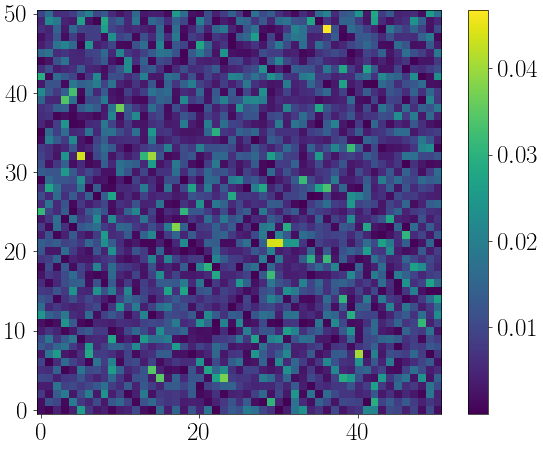

In [16]:
lens = SampleSkyPyLens()
model = lens.get_array(num_pix=51, side=5.61)
bkg_noise = lenstronomy_sim.get_background_noise(lens, model, band='f106')
plot.plot(bkg_noise, colorbar=True)

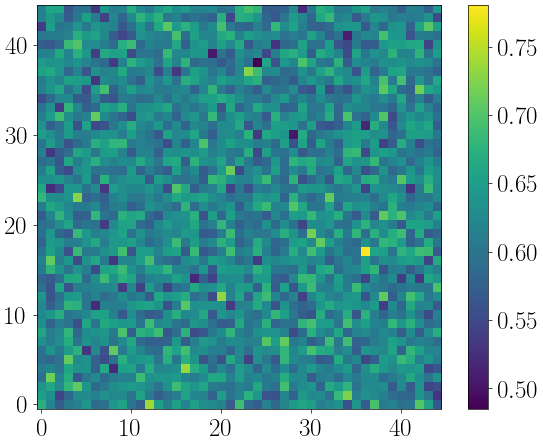

In [33]:
minzodi = np.load(os.path.join(repo_dir, 'mejiro', 'data', 'pandeia_bkg_minzodi_benchmark_f106.npy'))
plot.plot(util.center_crop_image(minzodi, (45, 45)), colorbar=True)

In [17]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens', 'lenstronomy_noise')
figure_dir = os.path.join(repo_dir, 'figures')

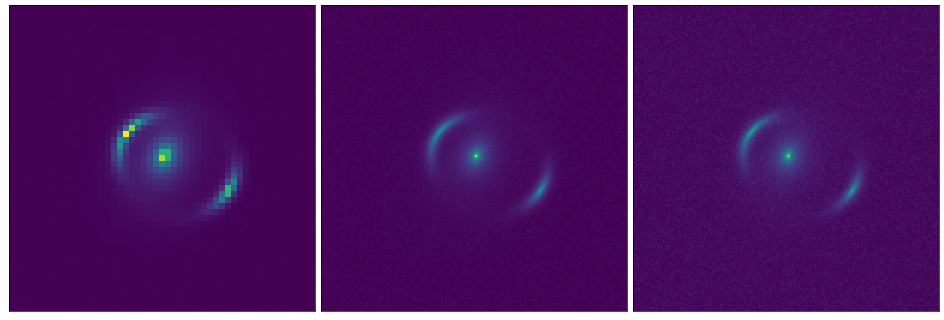

In [18]:
# look at inputs
inputs = [np.load(i) for i in glob(array_dir + '/input_*.npy')]
plot.plot_list(inputs)

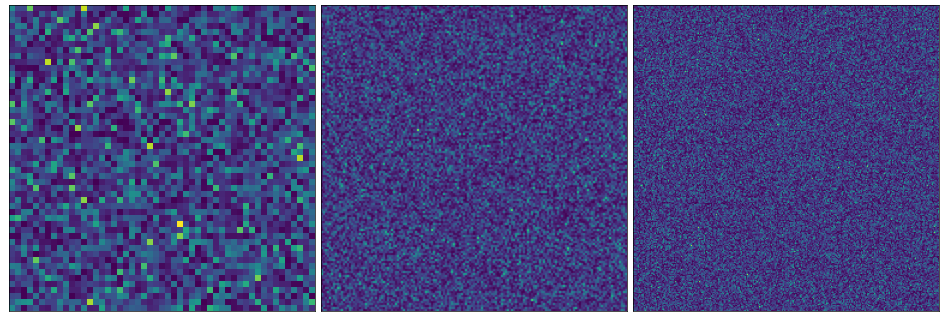

In [19]:
# look at noise
noise = [np.load(i) for i in glob(array_dir + '/noise_*.npy')]
plot.plot_list(noise)

In [20]:
grid_list = [1, 3]  # , 5
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]  # 

In [21]:
list_1, list_3, list_5 = [], [], []

for factor in grid_list:
    for num in num_samples:
        file = glob(array_dir + f'/sample_skypy_lens_lenstronomy_noise_{factor}_{num}.npy')[0]
        if factor == 1:
            list_1.append(np.load(file))
        elif factor == 3:
            list_3.append(np.load(file))
        elif factor == 5:
            list_5.append(np.load(file))

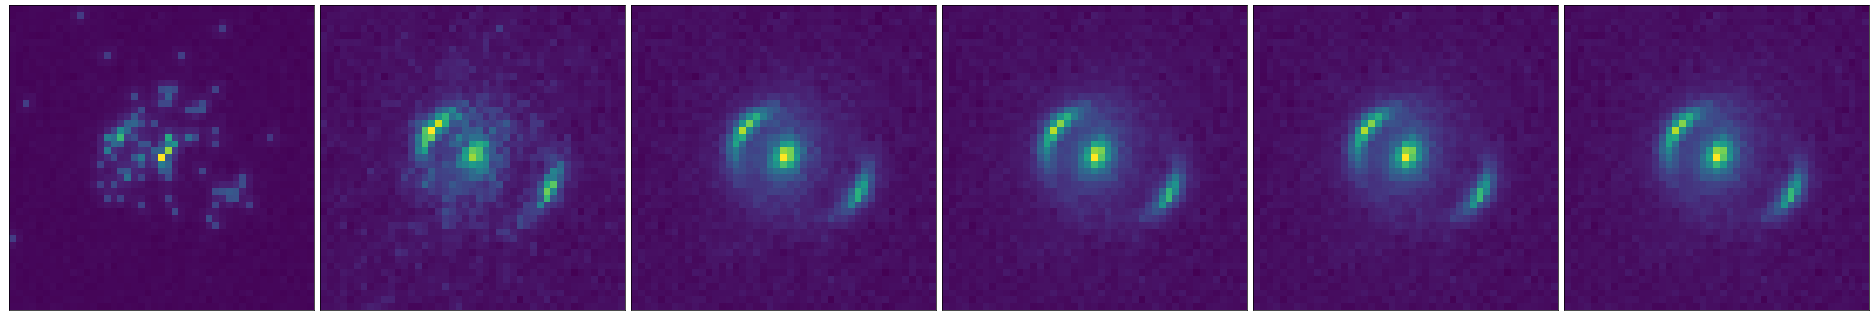

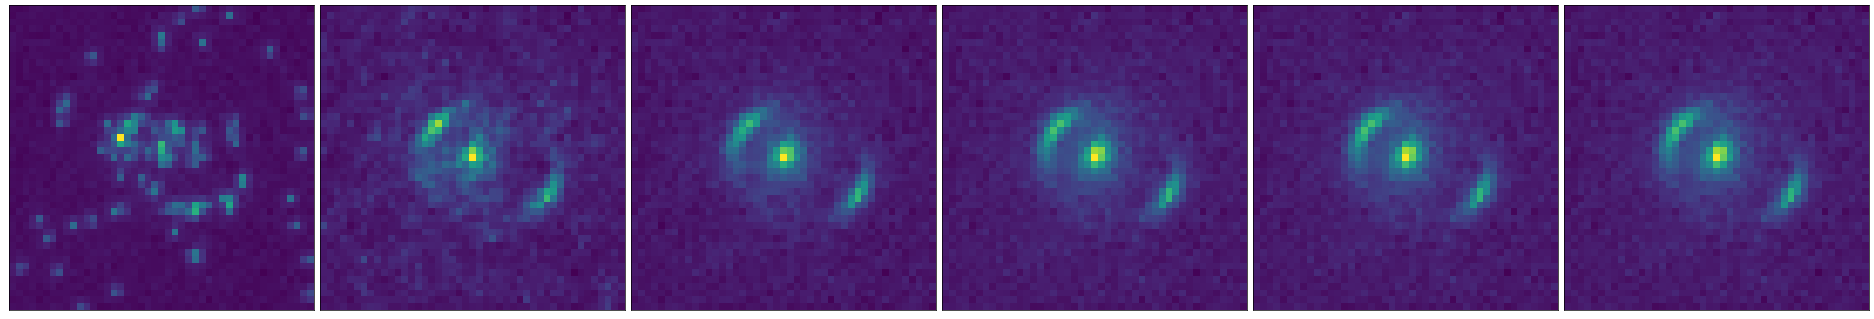

In [22]:
plot.plot_list(list_1)
plot.plot_list(list_3)
# plot.plot_list(list_5)

In [26]:
chi_1, chi_3, chi_5 = [], [], []
last_1 = list_1[-1]
last_3 = list_3[-1]
# last_5 = list_5[-1]

residuals_1 = plot_util.get_residual_list(list_1)
residuals_3 = plot_util.get_residual_list(list_3)
# residuals_5 = plot_util.get_residual_list(list_5)

for array in list_1:
    chi_1.append(stats.chi_square(array, last_1))
for array in list_3:
    chi_3.append(stats.chi_square(array, last_3))
# for array in list_5:
#     chi_5.append(stats.chi_square(array, last_5))

# chi_1 = ['$\chi^2 = $' + util.scientific_notation_string(i) for i in chi_1]
# chi_3 = ['$\chi^2 = $' + util.scientific_notation_string(i) for i in chi_3]
# chi_5 = ['$\chi^2 = $' + util.scientific_notation_string(i) for i in chi_5]

Text(0, 0.5, 'Mean $\\chi^2$')

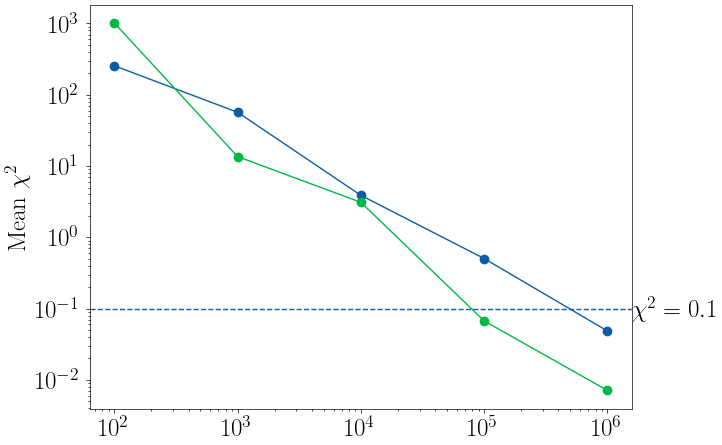

In [28]:
fig, ax = plt.subplots()

ax.plot(num_samples[:-1], chi_1[:-1], linestyle='-', marker='o')
ax.plot(num_samples[:-1], chi_3[:-1], linestyle='-', marker='o')
# ax.plot(num_samples[:-1], chi_5[:-1], linestyle='-', marker='o')
ax.axhline(y=0.1, linestyle='--')
x0, x1 = plt.gca().get_xlim()
ax.text(x1 * 1.5, 0.1, '$\chi^2=0.1$', ha='left', va='center')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Mean $\chi^2$')